In [28]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create

In [29]:
# Read in the data

df = pd.read_csv(r'/Users/lauren/Data Portfolio Projects/nba_2022-23_all_stats_with_salary.csv')

In [30]:
# Looking at the data
df.head()

,Unnamed: 0,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,...,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,...,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,...,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,...,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,...,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9


In [31]:
# Missing Data Check
# Percentage of missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

Unnamed: 0 - 0.0%
Player Name - 0.0%
Salary - 0.0%
Position - 0.0%
Age - 0.0%
Team - 0.0%
GP - 0.0%
GS - 0.0%
MP - 0.0%
FG - 0.0%
FGA - 0.0%
FG% - 0.0021413276231263384%
3P - 0.0%
3PA - 0.0%
3P% - 0.027837259100642397%
2P - 0.0%
2PA - 0.0%
2P% - 0.008565310492505354%
eFG% - 0.0021413276231263384%
FT - 0.0%
FTA - 0.0%
FT% - 0.04925053533190578%
ORB - 0.0%
DRB - 0.0%
TRB - 0.0%
AST - 0.0%
STL - 0.0%
BLK - 0.0%
TOV - 0.0%
PF - 0.0%
PTS - 0.0%
Total Minutes - 0.0%
PER - 0.0%
TS% - 0.0021413276231263384%
3PAr - 0.0021413276231263384%
FTr - 0.0021413276231263384%
ORB% - 0.0%
DRB% - 0.0%
TRB% - 0.0%
AST% - 0.0%
STL% - 0.0%
BLK% - 0.0%
TOV% - 0.0%
USG% - 0.0%
OWS - 0.0%
DWS - 0.0%
WS - 0.0%
WS/48 - 0.0%
OBPM - 0.0%
DBPM - 0.0%
BPM - 0.0%
VORP - 0.0%


In [36]:
# Sum of missing data
df[['FG%', '3P%', '2P%', 'eFG%', 'FT%', 'TS%', '3PAr', 'FTr']].isna().sum()

FG%      1
3P%     13
2P%      4
eFG%     1
FT%     23
TS%      1
3PAr     1
FTr      1
dtype: int64

In [32]:
# Data typyes for columns

df.dtypes

Unnamed: 0         int64
Player Name       object
Salary             int64
Position          object
Age                int64
Team              object
GP                 int64
GS                 int64
MP               float64
FG               float64
FGA              float64
FG%              float64
3P               float64
3PA              float64
3P%              float64
2P               float64
2PA              float64
2P%              float64
eFG%             float64
FT               float64
FTA              float64
FT%              float64
ORB              float64
DRB              float64
TRB              float64
AST              float64
STL              float64
BLK              float64
TOV              float64
PF               float64
PTS              float64
Total Minutes      int64
PER              float64
TS%              float64
3PAr             float64
FTr              float64
ORB%             float64
DRB%             float64
TRB%             float64
AST%             float64


In [38]:
# Rename PTS to PPG
df.rename(columns={'PTS':'PPG'}, inplace=True)

In [237]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix_1 = numeric_df.corr()
salary_corr = correlation_matrix_1['Salary'].sort_values(ascending=False)
print(salary_corr)
# PPG, FG, FGA, 2PA, VORP, 2P, FT, FTA, TOV, MP, WS, GS, AST, OWS, DRB, DWS, Total Minutes, TRB 
# all have a good or strong correlation with Salary

Salary            1.000000
PPG               0.727597
FG                0.720260
FGA               0.706393
2PA               0.681926
VORP              0.680339
2P                0.676406
FT                0.673772
FTA               0.668638
TOV               0.646808
MP                0.642099
Salary_per_PPG    0.641338
WS                0.624664
GS                0.602267
AST               0.593971
OWS               0.582416
DRB               0.576596
DWS               0.566990
Total Minutes     0.565897
TRB               0.503633
3PA               0.491569
USG%              0.488063
OBPM              0.486816
3P                0.480239
STL               0.449517
AST%              0.447976
Age               0.416072
PER               0.411790
PF                0.406488
BPM               0.382346
GP                0.341707
BLK               0.301344
WS/48             0.275959
ORB               0.219490
FT%               0.161174
TS%               0.160168
FTr               0.119623
F

In [278]:
strong_corr = salary_corr[abs(salary_corr) > 0.5]
print(strong_corr)

Salary            1.000000
PPG               0.727597
FG                0.720260
FGA               0.706393
2PA               0.681926
VORP              0.680339
2P                0.676406
FT                0.673772
FTA               0.668638
TOV               0.646808
MP                0.642099
Salary_per_PPG    0.641338
WS                0.624664
GS                0.602267
AST               0.593971
OWS               0.582416
DRB               0.576596
DWS               0.566990
Total Minutes     0.565897
TRB               0.503633
Unnamed: 0       -0.824079
Name: Salary, dtype: float64


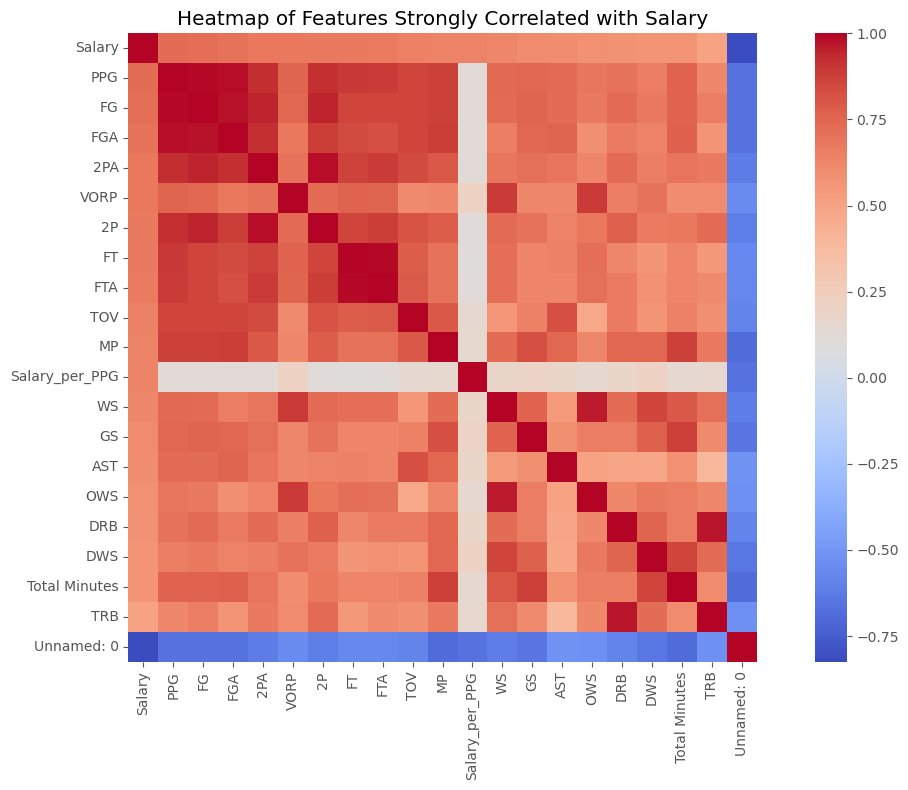

In [283]:
# Correlation Matrix
strong_corr = salary_corr[abs(salary_corr) > 0.5]
strong_features = strong_corr.index

strong_corr_matrix = correlation_matrix.loc[strong_features, strong_features]

sns.heatmap(strong_corr_matrix, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Heatmap of Features Strongly Correlated with Salary')
plt.tight_layout()
plt.show()

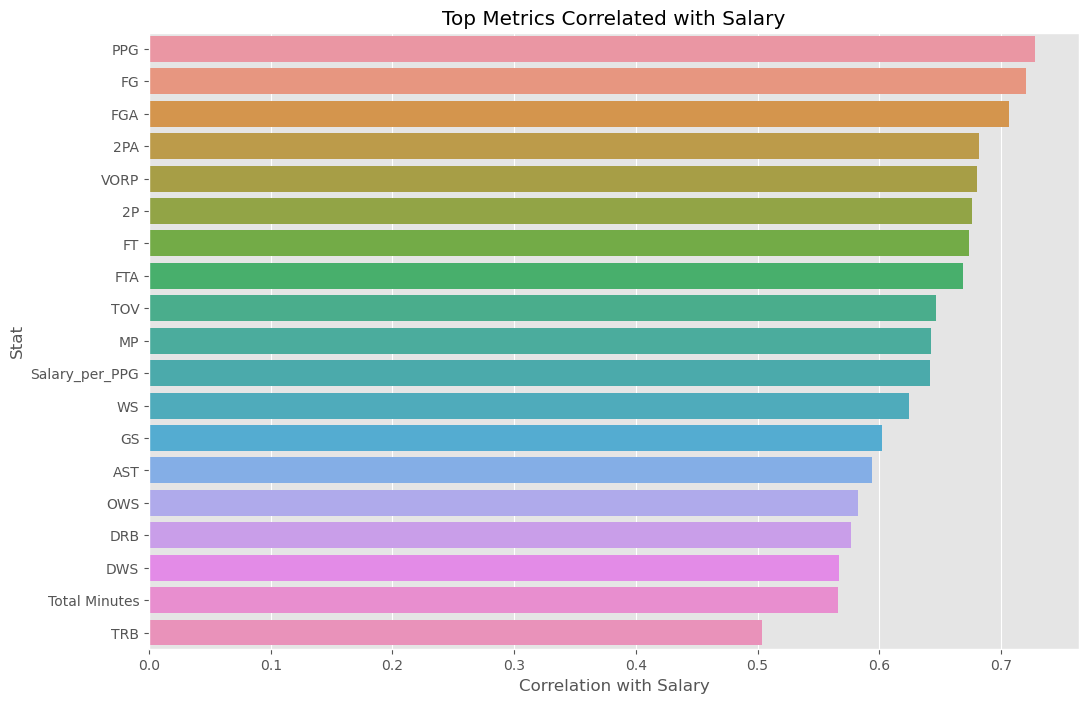

In [239]:
# Plot the correlation
strong_corr = salary_corr[salary_corr > 0.5]. drop('Salary')
sns.barplot(x=strong_corr.values, y=strong_corr.index)
plt.title('Top Metrics Correlated with Salary')
plt.xlabel('Correlation with Salary')
plt.ylabel('Stat')
plt.show()

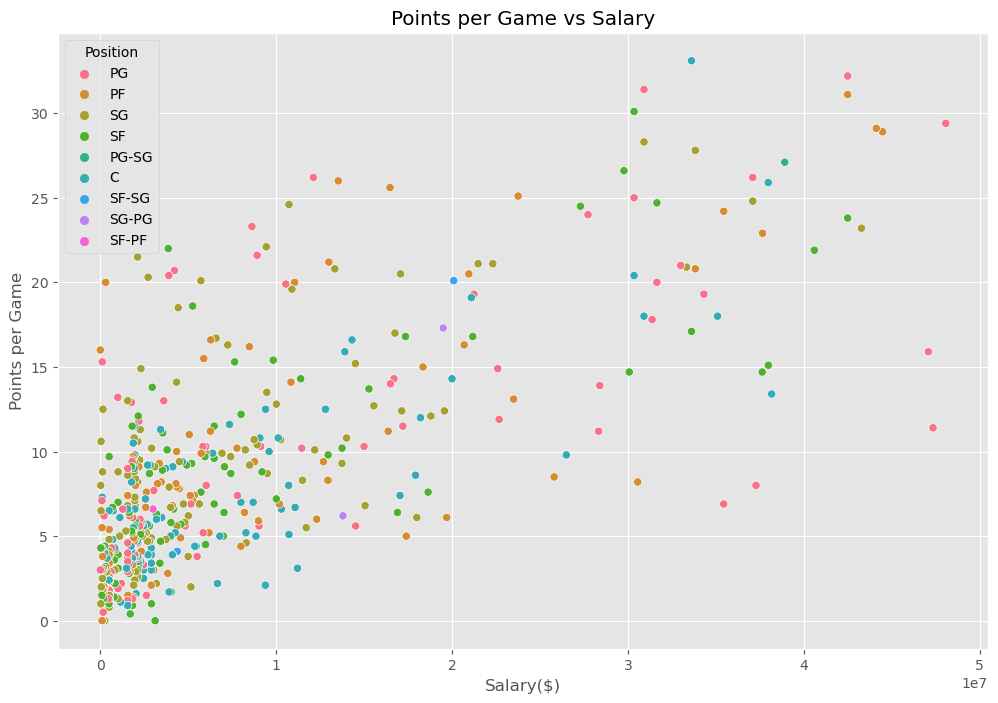

In [45]:
# Exploring the Correlation of Salary vs PPG
sns.scatterplot(data=df, x='Salary', y='PPG', hue='Position')

plt.title('Points per Game vs Salary')
plt.xlabel('Salary($)')
plt.ylabel('Points per Game')
plt.show()

In [330]:
# Create a Value Score
df['Value_Score'] = df['PPG']/df['Salary']

df['PPG'] = pd.to_numeric(df['PPG'], errors='coerce')
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')
df['Value_Score'] = df['PPG'] / df['Salary']

In [331]:
# Filter players with 0 PPG and 0 Salary
df_nonzero = df[(df['PPG'] > 0) & (df['Salary'] > 0)]

In [336]:
#Best Value Scorers 
best_value_scorers = df.sort_values(by='Value_Score', ascending=False).head(10)
print(best_value_scorers[['Player Name', 'PPG', 'Salary', 'Value_Score']])

            Player Name       PPG  Salary  Value_Score
465        RaiQuan Gray 16.000000    5849     0.002736
466       Jacob Gilyard  3.000000    5849     0.000513
464           Gabe York  8.000000   32171     0.000249
460  Jeenathan Williams 10.600000   52644     0.000201
452         Skylar Mays 15.300000  116574     0.000131
461          Jay Scrubb  6.500000   49719     0.000131
462       Justin Minaya  4.300000   35096     0.000123
445         Mac McClung 12.500000  160856     0.000078
457   Lindell Wigginton  7.100000   99438     0.000071
447  Shaquille Harrison  8.800000  134862     0.000065


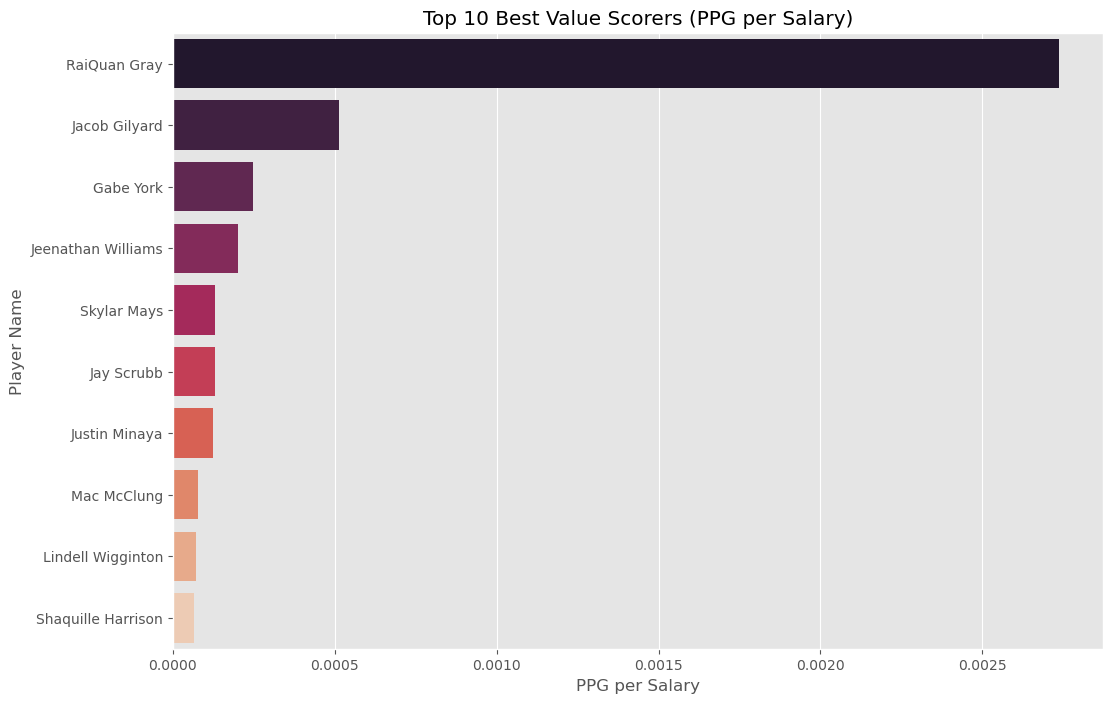

In [338]:
sns.barplot(x='Value_Score', y='Player Name', data=best_value_scorers, palette = 'rocket')
plt.title("Top 10 Best Value Scorers (PPG per Salary)")
plt.xlabel("PPG per Salary")
plt.ylabel("Player Name")
plt.show()

In [342]:
# Worst value: lowest PPG per dollar
worst_value_scorers = df_nonzero.sort_values(by='Value_Score', ascending=True).head(10)
print(worst_value_scorers[['Player Name', 'PPG', 'Salary', 'Value_Score']])

         Player Name       PPG    Salary  Value_Score
20       Ben Simmons  6.900000  35448672     0.000000
17      Kemba Walker  8.000000  37281261     0.000000
130     Nerlens Noel  2.100000   9391069     0.000000
356  Leandro Bolmaro  0.400000   1709300     0.000000
1          John Wall 11.400000  47345760     0.000000
36        Kevin Love  8.200000  30556968     0.000000
109   Richaun Holmes  3.100000  11215260     0.000000
70    Jonathan Isaac  5.000000  17400000     0.000000
61     Nicolas Batum  6.100000  19700319     0.000000
47    Draymond Green  8.500000  25806468     0.000000


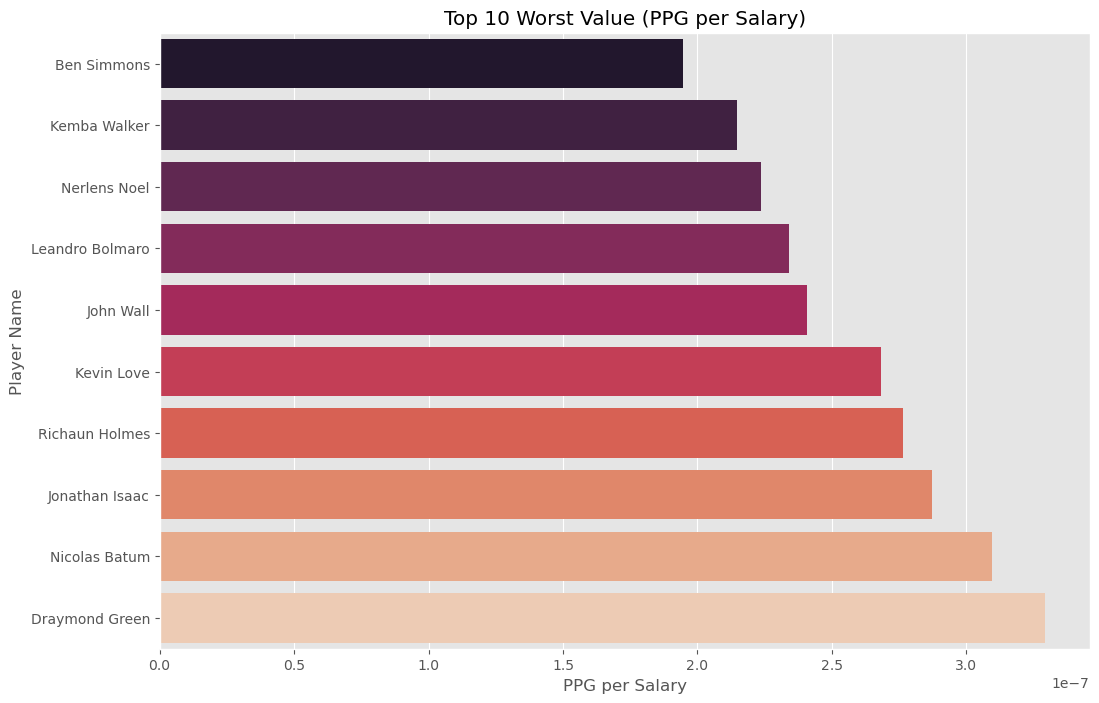

In [340]:
sns.barplot(x='Value_Score', y='Player Name', data=worst_value_scorers, palette ='rocket')
plt.title("Top 10 Worst Value (PPG per Salary)")
plt.xlabel("PPG per Salary")
plt.ylabel("Player Name")
plt.show()

In [310]:
# Salary per Point - Dollars spent per point scored
df['Salary_per_Point'] = df['Salary'] / df['PPG']

In [318]:
#Top Value of Players Salary per Point (lowest cost per point)
top_value_salary_per_point = df.sort_values(by='Salary_per_Point', ascending=True).head(10)
print(top_value_salary_per_point[['Player Name', 'PPG', 'Salary', 'Salary_per_Point']])

            Player Name       PPG  Salary  Salary_per_Point
465        RaiQuan Gray 16.000000    5849        365.562500
466       Jacob Gilyard  3.000000    5849       1949.666667
464           Gabe York  8.000000   32171       4021.375000
460  Jeenathan Williams 10.600000   52644       4966.415094
452         Skylar Mays 15.300000  116574       7619.215686
461          Jay Scrubb  6.500000   49719       7649.076923
462       Justin Minaya  4.300000   35096       8161.860465
445         Mac McClung 12.500000  160856      12868.480000
457   Lindell Wigginton  7.100000   99438      14005.352113
447  Shaquille Harrison  8.800000  134862      15325.227273


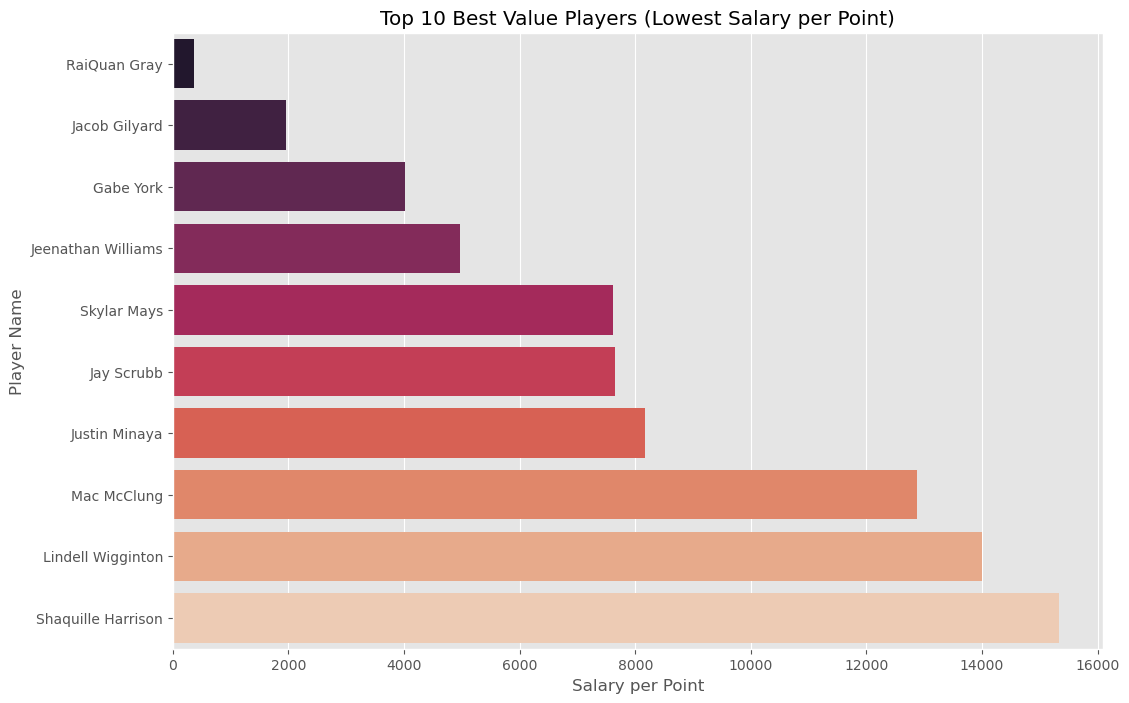

In [328]:
sns.barplot(x='Salary_per_Point', y='Player Name', data=top_value_salary_per_point, palette='rocket')
plt.title("Top 10 Best Value Players (Lowest Salary per Point)")
plt.xlabel("Salary per Point")
plt.ylabel("Player Name")
plt.show()

In [329]:
# Worst Value Players by Salary per Point (highest cost per point)
# Filter out any players who scored 0 points per game
worst_value_salary_per_point = df_nonzero.sort_values(by='Salary_per_Point', ascending=False).head(10)

# Print the table with selected columns
print(worst_value_salary_per_point[['Player Name', 'PPG', 'Salary', 'Salary_per_Point']])

         Player Name       PPG    Salary  Salary_per_Point
20       Ben Simmons  6.900000  35448672    5137488.695652
17      Kemba Walker  8.000000  37281261    4660157.625000
130     Nerlens Noel  2.100000   9391069    4471937.619048
356  Leandro Bolmaro  0.400000   1709300    4273250.000000
1          John Wall 11.400000  47345760    4153136.842105
36        Kevin Love  8.200000  30556968    3726459.512195
109   Richaun Holmes  3.100000  11215260    3617825.806452
70    Jonathan Isaac  5.000000  17400000    3480000.000000
61     Nicolas Batum  6.100000  19700319    3229560.491803
47    Draymond Green  8.500000  25806468    3036055.058824


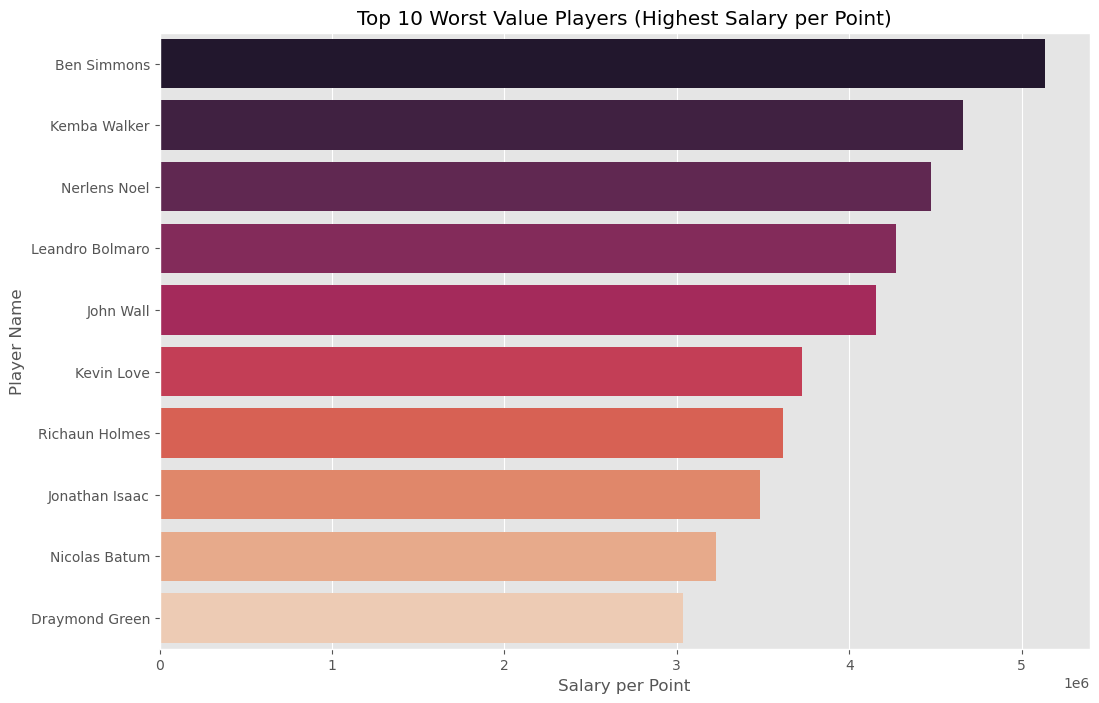

In [325]:
worst_value_salary_per_point = df_nonzero.sort_values(by='Salary_per_Point', ascending=False).head(10)

sns.barplot(x='Salary_per_Point', y='Player Name', data=worst_value_salary_per_point, palette='rocket')
plt.title("Top 10 Worst Value Players (Highest Salary per Point)")
plt.xlabel("Salary per Point")
plt.ylabel("Player Name")
plt.show()

In [254]:
# Create a Custom Metric for Performance using Salary Correlations
correlations = df.select_dtypes(include='number').corr()['Salary'].drop('Salary')

In [269]:
weights = correlations.abs()
weights = weights/ weights.sum()
print(weights.sort_values(ascending=False))

df['Custom_Score'] = 0
for stat, weights in weights.items():
    df['Custom_Score'] += df[stat] * weights

Unnamed: 0           0.041351
PPG                  0.036509
FG                   0.036141
FGA                  0.035445
2PA                  0.034218
VORP                 0.034138
2P                   0.033941
FT                   0.033809
FTA                  0.033551
TOV                  0.032455
MP                   0.032219
Salary_per_PPG       0.032181
WS                   0.031344
GS                   0.030221
AST                  0.029804
OWS                  0.029224
DRB                  0.028932
DWS                  0.028450
Total Minutes        0.028396
TRB                  0.025271
3PA                  0.024666
USG%                 0.024490
OBPM                 0.024427
3P                   0.024097
STL                  0.022556
AST%                 0.022479
Age                  0.020878
PER                  0.020663
PF                   0.020397
BPM                  0.019185
GP                   0.017146
BLK                  0.015121
WS/48                0.013847
ORB       

In [261]:
# Using the Custom Score to Find Undervalued and Overvalued Players

df['Value_Score'] = df['Custom_Score']/df['Salary']

In [265]:
top_undervalued = df.sort_values('Value_Score', ascending=False).head(10)
print(top_undervalued

     Unnamed: 0             Player Name   Salary Position  Age Team  GP  GS  \
365         365         Marko Simonovic  1563518        C   23  CHI   7   0   
342         342          Justin Jackson  1836090       SF   27  BOS  23   0   
463         463            Kobi Simmons    32795       SG   25  CHO   5   0   
381         381             Noah Vonleh  1160955        C   27  BOS  23   1   
411         411              Jack White   508891       SF   25  DEN  17   0   
363         363              Vit Krejci  1563518       PG   22  ATL  29   0   
429         429        Facundo Campazzo   464299       PG   31  DAL   8   0   
384         384           Tyrese Martin  1017781       SG   23  ATL  16   0   
335         335               KZ Okpala  1902133       PF   23  SAC  35   3   
337         337  Thanasis Antetokounmpo  1878720       PF   30  MIL  37   0   

          MP       FG  ...       WS     WS/48       OBPM      DBPM        BPM  \
365 2.900000 0.300000  ... 0.000000 -0.052000 -10

In [267]:
top_overvalued = df.sort_values('Value_Score', ascending=True).head(10)
print(top_overvalued)

    Unnamed: 0              Player Name    Salary Position  Age     Team  GP  \
27          27              Joel Embiid  33616770        C   28      PHI  66   
9            9           Damian Lillard  42492492       PG   32      POR  58   
34          34  Shai Gilgeous-Alexander  30913750       PG   24      OKC  68   
8            8    Giannis Antetokounmpo  42492492       PF   28      MIL  63   
37          37             Jayson Tatum  30351780       SF   24      BOS  74   
0            0            Stephen Curry  48070014       PG   34      GSW  56   
4            4             Kevin Durant  44119845       PF   34  BRK/PHO  47   
3            3             LeBron James  44474988       PF   38      LAL  55   
33          33         Donovan Mitchell  30913750       SG   26      CLE  68   
25          25             Devin Booker  33833400       SG   26      PHO  53   

    GS        MP        FG  ...        WS    WS/48     OBPM      DBPM  \
27  66 34.600000 11.000000  ... 12.300000 0.25

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


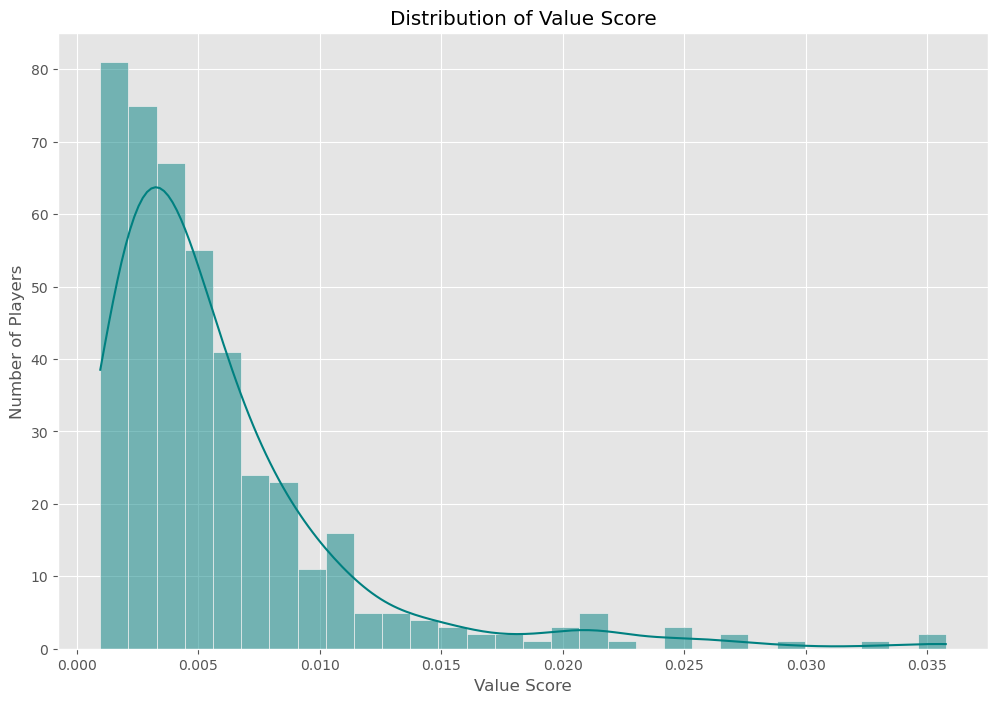

In [271]:
sns.histplot(df['Value_Score'], bins=30, kde=True, color='teal')

plt.title('Distribution of Value Score')
plt.xlabel('Value Score')
plt.ylabel('Number of Players')
plt.show()

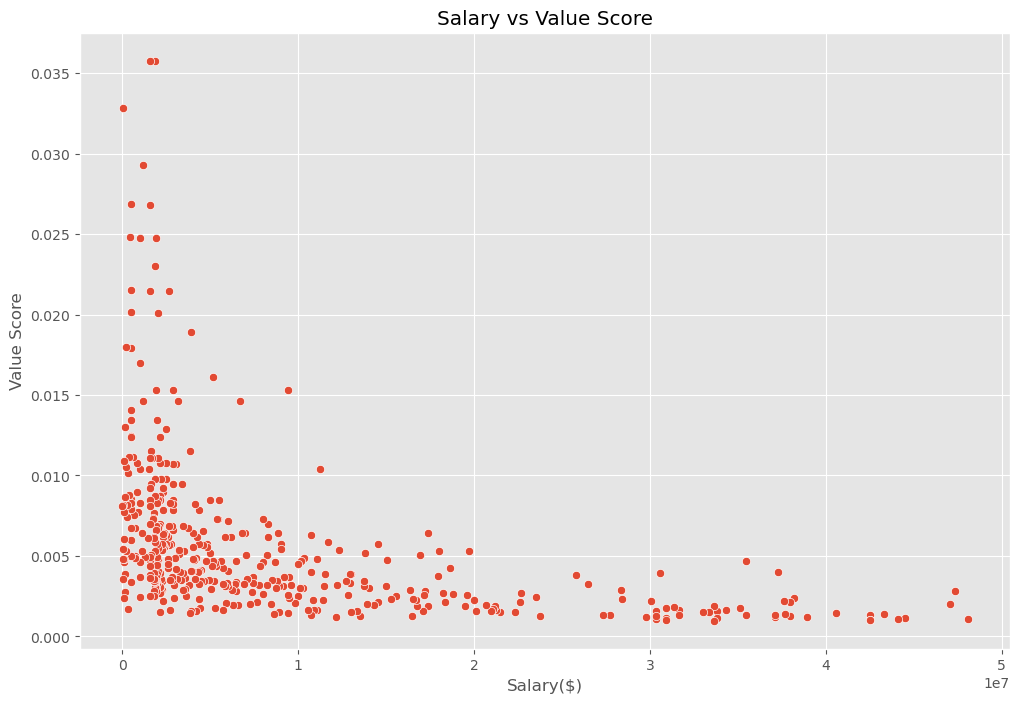

In [270]:
#Scatter plot of Salary vs Value Score
sns.scatterplot(data=df, x='Salary', y='Value_Score')

plt.title('Salary vs Value Score')
plt.xlabel('Salary($)')
plt.ylabel('Value Score')
plt.show()
# Negative relationship

<Axes: xlabel='Salary', ylabel='Value_Score'>

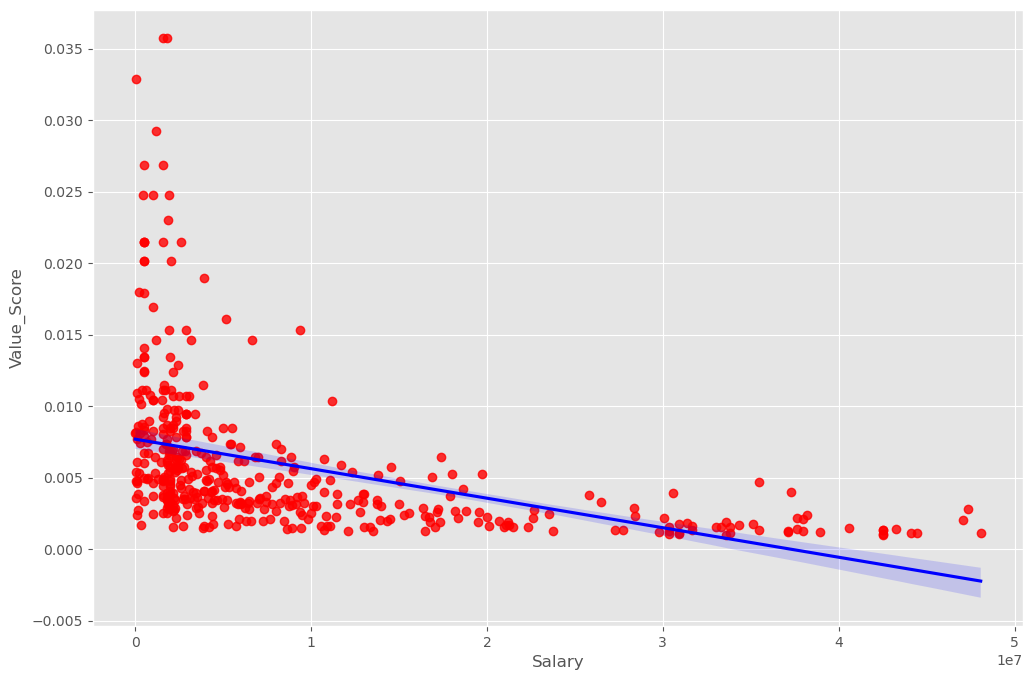

In [272]:
sns.regplot(data=df, x='Salary', y='Value_Score', scatter_kws={"color": "red"}, line_kws={"color": "blue"})

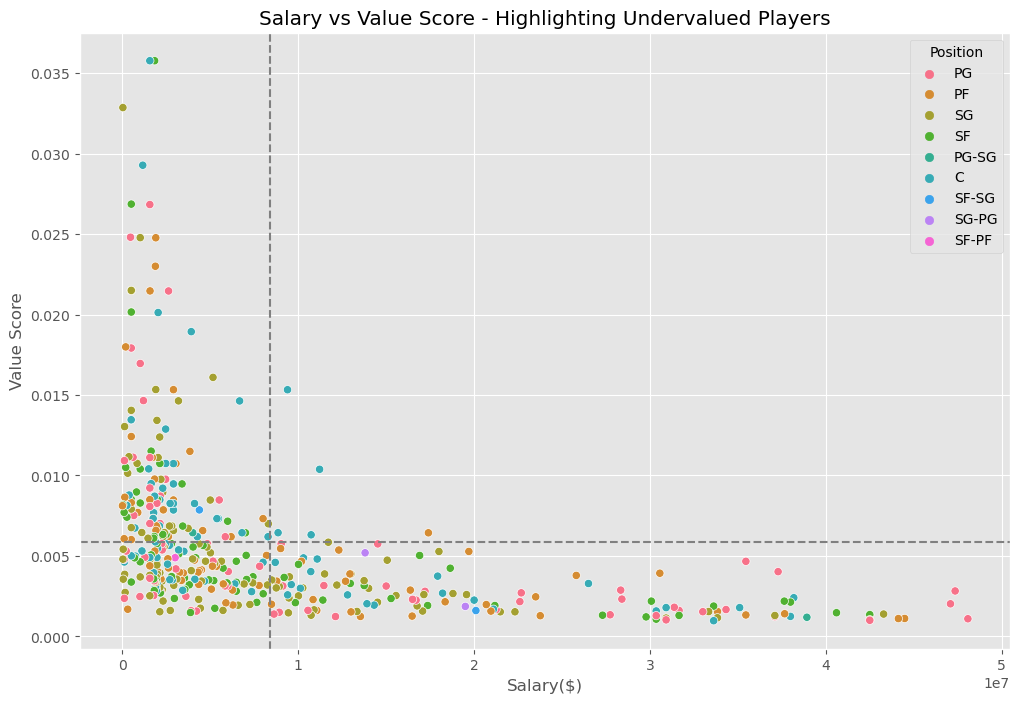

In [276]:
# Highlighting undervalued players
sns.scatterplot(x='Salary', y='Value_Score', hue='Position', data=df)
plt.axhline(df['Value_Score'].mean(), linestyle = '--', color='grey')
plt.axvline(df['Salary'].mean(), linestyle = '--', color='grey')
plt.title('Salary vs Value Score - Highlighting Undervalued Players')
plt.xlabel('Salary($)')
plt.ylabel('Value Score')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



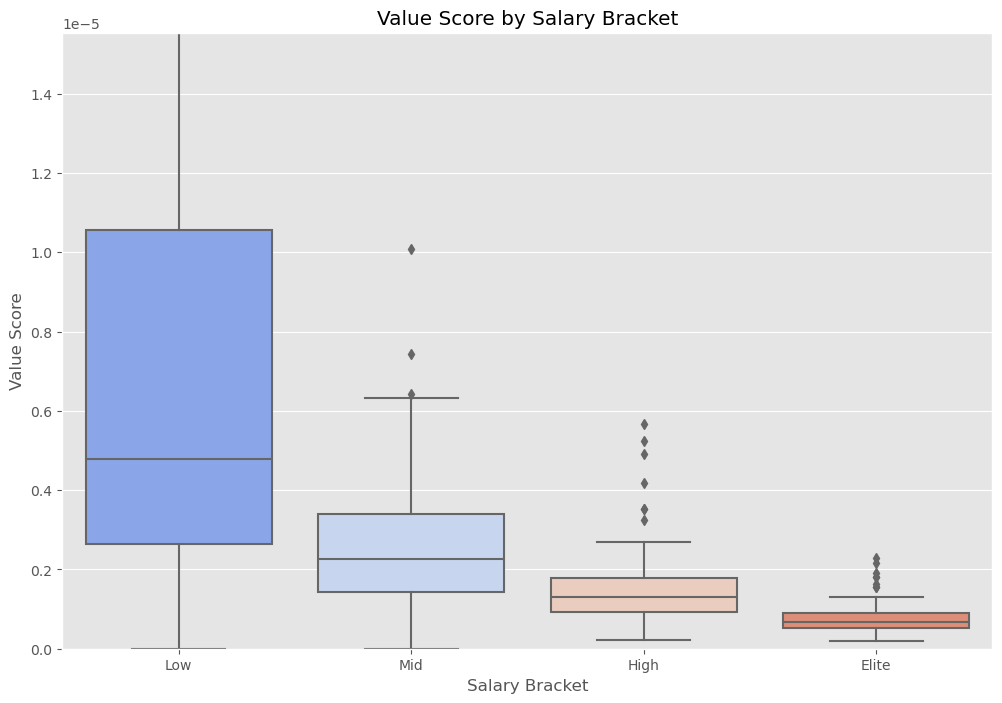

In [347]:
# Box plot for Salary Brackets
# Limit the y-axis to the 95th percentile to reduce the effect of extreme outliers

df['Salary_Bracket'] = pd.qcut(df['Salary'], q=4, labels=['Low', 'Mid', 'High', 'Elite'])

sns.boxplot(data=df, x='Salary_Bracket', y='Value_Score', palette='coolwarm')
plt.ylim(0, df['Value_Score'].quantile(0.95))  # Trim extreme top values
plt.title('Value Score by Salary Bracket')
plt.xlabel('Salary Bracket')
plt.ylabel('Value Score')
plt.show()

In [284]:
# Exploring Salary by Team
team_stats = df.groupby('Team').agg({
    'Salary': 'sum',
    'PPG': 'mean',
    'PER': 'mean',
    'WS': 'sum',
    'VORP': 'sum',
    'MP': 'mean',
    'AST': 'mean',
    'TRB': 'mean',
    'TS%': 'mean'
}).reset_index()

In [289]:
numeric_team_stats = team_stats.select_dtypes(include=['number'])
team_corr = numeric_team_stats.corr()
print(team_corr['Salary'].sort_values(ascending=False))

Salary   1.000000
WS       0.932651
VORP     0.876359
PPG      0.417616
AST      0.342959
MP       0.319745
PER      0.161668
TRB      0.158314
TS%      0.089924
Name: Salary, dtype: float64


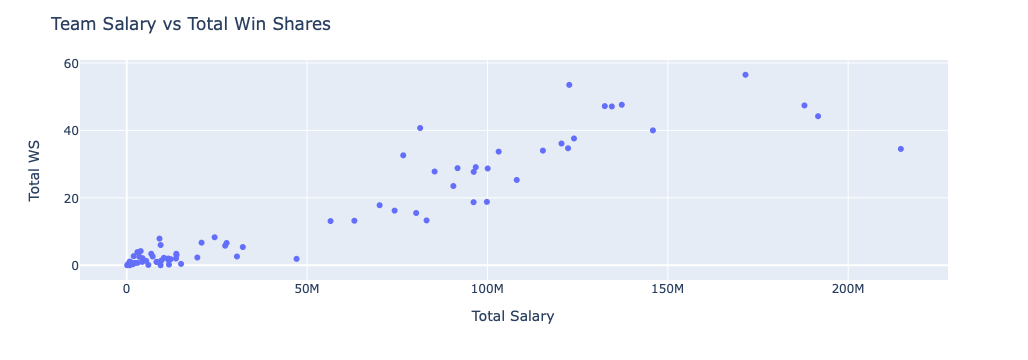

In [302]:
import plotly.express as px

# Scatter Plot for Salary vs WS by Team
fig = px.scatter(
    team_stats, 
    x='Salary', 
    y='WS', 
    hover_name='Team',
    size_max=60
)

fig.update_layout(
    title='Team Salary vs Total Win Shares',
    xaxis_title='Total Salary',
    yaxis_title='Total WS'
)

fig.show()

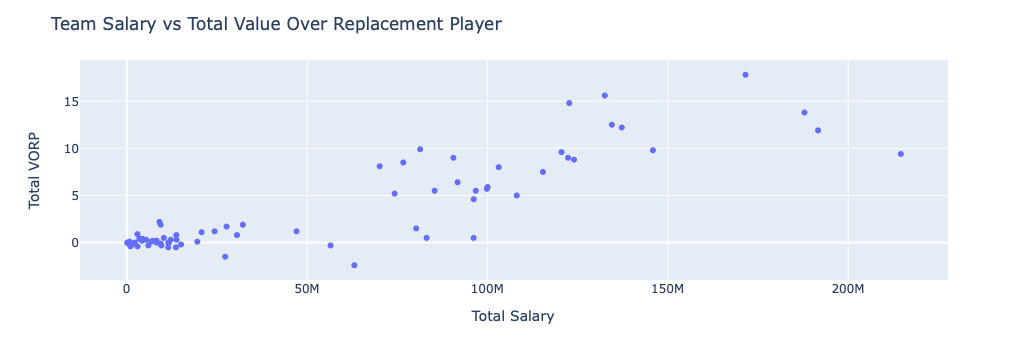

In [303]:
# Scatter Plot for Salary vs VORP by Team
fig = px.scatter(
    team_stats, 
    x='Salary', 
    y='VORP', 
    hover_name='Team',
    size_max=60
)

fig.update_layout(
    title='Team Salary vs Total Value Over Replacement Player',
    xaxis_title='Total Salary',
    yaxis_title='Total VORP'
)

fig.show()

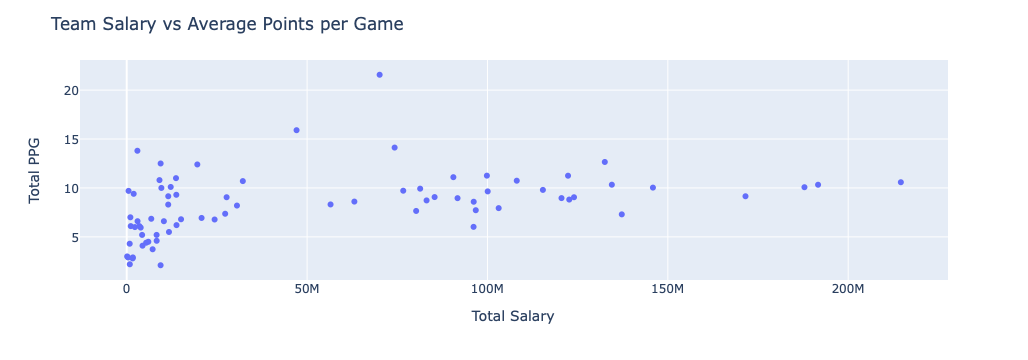

In [305]:
# Scatter Plot for Salary vs PPG by Team
fig = px.scatter(
    team_stats, 
    x='Salary', 
    y='PPG', 
    hover_name='Team',
    size_max=60
)

fig.update_layout(
    title='Team Salary vs Average Points per Game',
    xaxis_title='Total Salary',
    yaxis_title='Total PPG'
)

fig.show()